In [1]:
#Prabhat Thakur Date 04/20/2019
#2019SP_MSDS_458-DL_SEC56 Week3- Assignment1
#25-Input-Node Alphabet Letter Classification (5 Classes)
#Code Addopted from simple_5x5-letter-classification_tutorial-code_v7_2017-10-15.py and F. Challot (2018), Deep Learning with Python (Manning)

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

from keras import models
from keras import layers
from keras import backend as K

# to make this notebook's output stable across runs
np.random.seed(42)

# For pretty-printing the arrays
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) 

C:\Users\prabhatkumar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def welcome ():
    print (' ' )
    print ('******************************************************************************')
    print (' ' )
    print ('This program learns to distinguish between five capital letters: X, M, H, A, and N')
    print ('It allows users to examine the hidden weights to identify learned features')
    print (' ' )
    print ('******************************************************************************')
    print (' ' )
    return()


In [3]:
####################################################################################################
####################################################################################################
#
# Function to obtain the neural network size specifications
#
####################################################################################################
####################################################################################################

def obtainNeuralNetworkSizeSpecs ():

# This procedure operates as a function, as it returns a single value (which really is a list of 
#    three values). It is called directly from 'main.'
#        
# This procedure allows the user to specify the size of the input (I), hidden (H), 
#    and output (O) layers.  
# These values will be stored in a list, the arraySizeList. 
# However, even though we're calling this procedure, we will still hard-code the array sizes for now.   

    numInputNodes = 25
    numHiddenNodes = 8
    numOutputNodes = 5   
    print (' ')
    print ('  The number of nodes at each level are:')
    print ('    Input: 5x5 (square array)')
    print ('    Hidden: 8')
    print ('    Output: 5 (Five classes)')
            
# We create a list containing the crucial SIZES for the connection weight arrays                
    arraySizeList = (numInputNodes, numHiddenNodes, numOutputNodes)
    
# We return this list to the calling procedure, 'main'.       
    return (arraySizeList)  

In [4]:
# Function to return a trainingDataList
# The training data list have 5x5 pixel-grid representation of the letter
#       represented as a 1-D array (0 or 1 for each)
# Also contains string associated with that class, e.g., 'X'
# We are starting with five letters in the training set: X, M, N, H, and A
# Thus there are five choices for training data, which we'll select on random basis

def process_data():

    training_alpha = [(0,[1,0,0,0,1, 0,1,0,1,0, 0,0,1,0,0, 0,1,0,1,0, 1,0,0,0,1],'X'),
                     (1,[1,0,0,0,1, 1,1,0,1,1, 1,0,1,0,1, 1,0,0,0,1, 1,0,0,0,1],'M'),
                     (2,[1,0,0,0,1, 1,1,0,0,1, 1,0,1,0,1, 1,0,0,1,1, 1,0,0,0,1],'N'),
                     (3,[1,0,0,0,1, 1,0,0,0,1, 1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1],'H'),
                     (4,[0,0,1,0,0, 0,1,0,1,0, 1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1],'A')]
   
    # List of indices to be one-hot encoded
    indices = []

    # Initial array to load training data
    training_data = np.zeros((len(training_alpha), 25))

    # List of letter labels
    letters = []

    # Loop through letters to process data
    for i in training_alpha:
        indices.extend([i[0]])
        training_data[i[0]] = i[1]
        letters.extend([i[2]])

    # One hot encode letters
    indices_array = np.array(indices)
    labels = np.zeros((5, 5))
    labels[np.arange(5), indices_array] = 1

    return labels, training_data, letters


In [5]:
def display_letter(case_input_single):
    """Quick display of letter (assuming square)"""

    # Dimension assuming square
    img_size = np.sqrt(case_input_single.shape[0]).astype(int)

    # Reshape assumping square
    img = case_input_single.reshape(img_size, img_size)

    # Select white background with blue letters
    colors = np.array([[1, 1, 1],
                       [0, 0, 1]])
    cmap = matplotlib.colors.ListedColormap(colors)

    # Show image
    plt.imshow(img, cmap=cmap)
    plt.show()

In [6]:
def display_all(case_input):
    """Plot all letters in a set"""

    for i in range(0, case_input.shape[0]):
        display_letter(case_input[i])



In [7]:
def print_weights(model):
    
    weights0, biases0 = model.layers[0].get_weights()
    print ('weights - Input-Hidden')
    print (weights0)
    print ('biases - Input-Hidden')
    print (biases0)
    print ('******************************************************************************')    
    weights1, biases1 = model.layers[1].get_weights()
    print ('weights - Hidden-Output')
    print (weights1)
    print ('biases - Hidden-Output')
    print (biases1)  
    print ('******************************************************************************')
    print ('******************************************************************************')
    return [weights0, weights1]

In [8]:
def display_influence(case_input_single, credit1,output):
    """Quick display of hidden layer activations for a single letter"""
    
    # Dimension assuming square
    img_size = np.sqrt(case_input_single.shape[0]).astype(int)

    # Reshape assumping square
    img = case_input_single.reshape(img_size, img_size)

    # Select white background with gray letters
    colors = np.array([[1, 1, 1],
                       [0.9, 0.9, 0.9]])

    cmap = matplotlib.colors.ListedColormap(colors)

    # Show image
    plt.imshow(img, cmap=cmap)
    plt.show()
    
    # Normalize for uniform colors
    credit = (credit1 - credit1.min()) / (credit1.max() - credit1.min())

    # Loop through nodes
    #f,ax = plt.subplots(1,credit.shape[0])
    
    for i in range(0, credit.shape[0]):

        #print(f"\nActivation = {output[0][0][i]:.4f}")
        print('Node "%s" activation value= ' %str(i+1),output[0][0][i])
        # Plot another layer showing infuence values
        influence = credit[i].reshape(img_size, img_size)

        plt.imshow(influence, vmin=0, vmax=1,
                         cmap=plt.cm.coolwarm, alpha=0.5, interpolation='bilinear',)
        plt.show()


In [9]:
def activation_outputs(model,data,labels,weight):
    print ('******Input to Hidden Layer Weights After Training **********')
    weightnpa=np.asarray(weight, dtype=np.float32)
    weightnpa = weightnpa.transpose()
    print(type(weightnpa))
    print (weightnpa.shape[:])
    print (weightnpa)
        
    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers]          # all layer outputs
    functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]
    
    for i in range(0, data.shape[0]):
        data_single = data[i:i+1]
        target_single = labels[i]
             
        layer_outs = [func([data_single,1.]) for func in functors]
        print ('Hidden Layer Outputs for "%s":' %target_single, layer_outs[0])
        print ('Output Layer Outputs for "%s":' %target_single, layer_outs[1])

        credit = data_single[0] * weightnpa
        display_influence(data_single[0],credit,layer_outs[0])

In [10]:
def main():
    """Load data, visualize, train model"""
    welcome()    
        
    # Define the variable arraySizeList, which is a list. It is initially an empty list. 
    # Its purpose is to store the size of the array.

    arraySizeList = list() # empty list

    # Obtain the actual sizes for each layer of the network       
    arraySizeList = obtainNeuralNetworkSizeSpecs ()

    # Unpack the list; ascribe the various elements of the list to the sizes of different network layers    
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]

    # Load data
    training_labels, training_data, letters = process_data()

    # Visualize all letters
    display_all(training_data)

    #Neural Network with Densely connected (fully connected) Single hidden layer 
    network = models.Sequential()
    network.add(layers.Dense(hiddenArrayLength, activation='relu', input_shape= (inputArrayLength,)))
    network.add(layers.Dense(outputArrayLength, activation='softmax'))
    
    network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    
    print ('Weights and Biases Before Traning:')    
    weightsBT = print_weights(network)
 
    history = network.fit(training_data, training_labels, epochs=500, batch_size=5)

    print ('Weights and Biases After Traning:')
    weightsAT =print_weights(network)

    history_dict = history.history
    print ('history_dict.keys()')
    print (history_dict.keys())   

    loss_values = history_dict['loss']
    acc_values = history_dict['acc']
    
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, acc_values, 'b', label='Training acc')
    plt.title('Training loss and Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()
    
    print ('******************************************************************************') 
    print ('Testing for training_data X')
    print (training_data[0])
    print ('training_labels One Hot encoding')
    print (training_labels[0])
    
    test_loss, test_acc = network.evaluate(training_data[0:1], training_labels[0:1])
    print('test_acc:', test_acc)

    predictions = network.predict(training_data[0:1])
    print ('# of Predicted values : ', predictions[0].shape)
    print ('Predicted probabilities of each letter : ', predictions[0])
    print ('Sum of Predicted probabilities : ', np.sum(predictions[0]))
    print ('The class with the highest probability : ', np.argmax(predictions[0]))
    print ('Predicted Letter : ',letters[np.argmax(predictions[0])])
    print ('******************************************************************************')    
    
    activation_outputs(network,training_data,letters,weightsAT[0])


 
******************************************************************************
 
This program learns to distinguish between five capital letters: X, M, H, A, and N
It allows users to examine the hidden weights to identify learned features
 
******************************************************************************
 
 
  The number of nodes at each level are:
    Input: 5x5 (square array)
    Hidden: 8
    Output: 5 (Five classes)


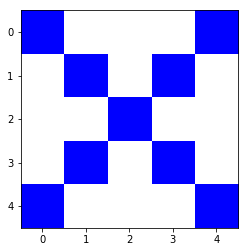

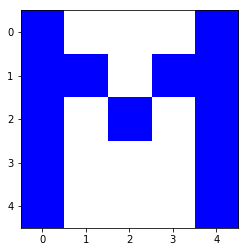

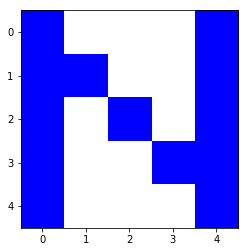

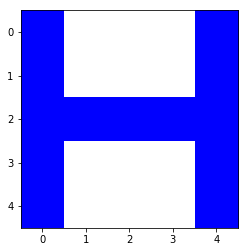

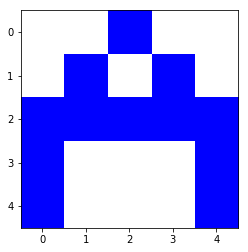

Weights and Biases Before Traning:
weights - Input-Hidden
[[ 0.32   0.087  0.38   0.037 -0.406  0.355  0.069  0.311]
 [ 0.301 -0.11  -0.216 -0.418 -0.02  -0.006 -0.039  0.306]
 [-0.223 -0.227 -0.005  0.226  0.299  0.167 -0.312  0.163]
 [ 0.216  0.22   0.38  -0.308  0.209  0.194  0.362 -0.199]
 [ 0.351  0.398 -0.225  0.063  0.144  0.231 -0.025  0.197]
 [ 0.186  0.173  0.358  0.124  0.335  0.004  0.39  -0.287]
 [ 0.345 -0.359 -0.229 -0.097  0.027  0.101  0.349 -0.106]
 [-0.415  0.014  0.421 -0.285 -0.138 -0.426 -0.359  0.132]
 [-0.21   0.193 -0.15  -0.088 -0.374  0.344 -0.336  0.197]
 [-0.03  -0.005 -0.392 -0.321  0.41  -0.317  0.304  0.064]
 [ 0.265  0.001  0.139  0.153  0.246  0.065 -0.138  0.227]
 [-0.345  0.353  0.25   0.038 -0.089  0.31  -0.002 -0.271]
 [-0.194 -0.417  0.004 -0.193  0.022  0.406  0.169 -0.058]
 [ 0.222  0.339 -0.035 -0.009  0.038 -0.021  0.315  0.308]
 [ 0.087 -0.167 -0.394 -0.365 -0.054 -0.414  0.279 -0.293]
 [-0.379  0.408 -0.048  0.31  -0.017 -0.193 -0.007  0.398

Epoch 65/500
5/5 [==============================] - 0s 800us/step - loss: 1.4341 - acc: 0.4000
Epoch 66/500
5/5 [==============================] - 0s 800us/step - loss: 1.4300 - acc: 0.4000
Epoch 67/500
5/5 [==============================] - 0s 799us/step - loss: 1.4237 - acc: 0.6000
Epoch 68/500
5/5 [==============================] - 0s 800us/step - loss: 1.4189 - acc: 0.6000
Epoch 69/500
5/5 [==============================] - 0s 800us/step - loss: 1.4135 - acc: 0.6000
Epoch 70/500
5/5 [==============================] - 0s 800us/step - loss: 1.4091 - acc: 0.6000
Epoch 71/500
5/5 [==============================] - 0s 800us/step - loss: 1.4035 - acc: 0.4000
Epoch 72/500
5/5 [==============================] - 0s 800us/step - loss: 1.3985 - acc: 0.4000
Epoch 73/500
5/5 [==============================] - 0s 0us/step - loss: 1.3932 - acc: 0.4000
Epoch 74/500
5/5 [==============================] - 0s 0us/step - loss: 1.3891 - acc: 0.4000
Epoch 75/500
5/5 [==============================] - 0s

Epoch 152/500
5/5 [==============================] - 0s 800us/step - loss: 1.0203 - acc: 1.0000
Epoch 153/500
5/5 [==============================] - 0s 800us/step - loss: 1.0157 - acc: 1.0000
Epoch 154/500
5/5 [==============================] - 0s 799us/step - loss: 1.0113 - acc: 1.0000
Epoch 155/500
5/5 [==============================] - 0s 800us/step - loss: 1.0077 - acc: 1.0000
Epoch 156/500
5/5 [==============================] - 0s 800us/step - loss: 1.0029 - acc: 1.0000
Epoch 157/500
5/5 [==============================] - 0s 800us/step - loss: 0.9989 - acc: 1.0000
Epoch 158/500
5/5 [==============================] - 0s 800us/step - loss: 0.9947 - acc: 1.0000
Epoch 159/500
5/5 [==============================] - 0s 800us/step - loss: 0.9902 - acc: 1.0000
Epoch 160/500
5/5 [==============================] - 0s 800us/step - loss: 0.9870 - acc: 1.0000
Epoch 161/500
5/5 [==============================] - 0s 800us/step - loss: 0.9816 - acc: 1.0000
Epoch 162/500
5/5 [=====================

Epoch 238/500
5/5 [==============================] - 0s 0us/step - loss: 0.6929 - acc: 1.0000
Epoch 239/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6899 - acc: 1.0000
Epoch 240/500
5/5 [==============================] - 0s 799us/step - loss: 0.6858 - acc: 1.0000
Epoch 241/500
5/5 [==============================] - 0s 800us/step - loss: 0.6829 - acc: 1.0000
Epoch 242/500
5/5 [==============================] - 0s 0us/step - loss: 0.6793 - acc: 1.0000
Epoch 243/500
5/5 [==============================] - 0s 0us/step - loss: 0.6758 - acc: 1.0000
Epoch 244/500
5/5 [==============================] - 0s 0us/step - loss: 0.6723 - acc: 1.0000
Epoch 245/500
5/5 [==============================] - 0s 0us/step - loss: 0.6692 - acc: 1.0000
Epoch 246/500
5/5 [==============================] - 0s 0us/step - loss: 0.6656 - acc: 1.0000
Epoch 247/500
5/5 [==============================] - 0s 799us/step - loss: 0.6621 - acc: 1.0000
Epoch 248/500
5/5 [==============================] - 0

Epoch 324/500
5/5 [==============================] - 0s 800us/step - loss: 0.4205 - acc: 1.0000
Epoch 325/500
5/5 [==============================] - 0s 800us/step - loss: 0.4183 - acc: 1.0000
Epoch 326/500
5/5 [==============================] - 0s 0us/step - loss: 0.4156 - acc: 1.0000
Epoch 327/500
5/5 [==============================] - 0s 800us/step - loss: 0.4126 - acc: 1.0000
Epoch 328/500
5/5 [==============================] - 0s 800us/step - loss: 0.4099 - acc: 1.0000
Epoch 329/500
5/5 [==============================] - 0s 800us/step - loss: 0.4074 - acc: 1.0000
Epoch 330/500
5/5 [==============================] - 0s 800us/step - loss: 0.4049 - acc: 1.0000
Epoch 331/500
5/5 [==============================] - 0s 0us/step - loss: 0.4022 - acc: 1.0000
Epoch 332/500
5/5 [==============================] - 0s 0us/step - loss: 0.3996 - acc: 1.0000
Epoch 333/500
5/5 [==============================] - 0s 0us/step - loss: 0.3968 - acc: 1.0000
Epoch 334/500
5/5 [=============================

Epoch 410/500
5/5 [==============================] - 0s 0us/step - loss: 0.2292 - acc: 1.0000
Epoch 411/500
5/5 [==============================] - 0s 0us/step - loss: 0.2276 - acc: 1.0000
Epoch 412/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2258 - acc: 1.0000
Epoch 413/500
5/5 [==============================] - 0s 0us/step - loss: 0.2239 - acc: 1.0000
Epoch 414/500
5/5 [==============================] - 0s 800us/step - loss: 0.2222 - acc: 1.0000
Epoch 415/500
5/5 [==============================] - 0s 0us/step - loss: 0.2205 - acc: 1.0000
Epoch 416/500
5/5 [==============================] - 0s 0us/step - loss: 0.2186 - acc: 1.0000
Epoch 417/500
5/5 [==============================] - 0s 0us/step - loss: 0.2169 - acc: 1.0000
Epoch 418/500
5/5 [==============================] - 0s 0us/step - loss: 0.2156 - acc: 1.0000
Epoch 419/500
5/5 [==============================] - 0s 799us/step - loss: 0.2137 - acc: 1.0000
Epoch 420/500
5/5 [==============================] - 0s 

Epoch 496/500
5/5 [==============================] - 0s 800us/step - loss: 0.1102 - acc: 1.0000
Epoch 497/500
5/5 [==============================] - 0s 623us/step - loss: 0.1092 - acc: 1.0000
Epoch 498/500
5/5 [==============================] - 0s 0us/step - loss: 0.1082 - acc: 1.0000
Epoch 499/500
5/5 [==============================] - 0s 800us/step - loss: 0.1072 - acc: 1.0000
Epoch 500/500
5/5 [==============================] - 0s 800us/step - loss: 0.1061 - acc: 1.0000
Weights and Biases After Traning:
weights - Input-Hidden
[[ 0.315  0.573  0.38  -0.068 -0.041  0.275 -0.375  0.51 ]
 [ 0.301 -0.11  -0.216 -0.418 -0.02  -0.006 -0.039  0.306]
 [-0.001 -0.467 -0.005  0.696 -0.001  0.32   0.166  0.136]
 [ 0.216  0.22   0.38  -0.308  0.209  0.194  0.362 -0.199]
 [ 0.346  0.884 -0.225 -0.041  0.509  0.151 -0.469  0.396]
 [ 0.118  0.403  0.358 -0.16   0.701  0.332  0.187 -0.546]
 [ 0.221 -0.315 -0.229  0.398  0.489 -0.386  0.85   0.1  ]
 [-0.415  0.014  0.421 -0.285 -0.138 -0.426 -0.359  

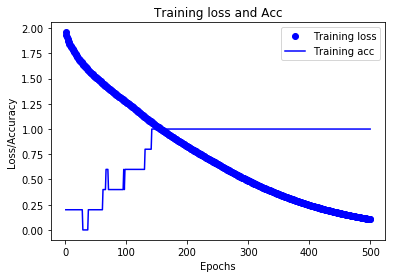

******************************************************************************
Testing for training_data X
[1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1.]
training_labels One Hot encoding
[1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 22ms/step
test_acc: 1.0
# of Predicted values :  (5,)
Predicted probabilities of each letter :  [0.994 0.006 0.    0.    0.   ]
Sum of Predicted probabilities :  1.0000001
The class with the highest probability :  0
Predicted Letter :  X
******************************************************************************
******Input to Hidden Layer Weights After Training **********
<class 'numpy.ndarray'>
(8, 25)
[[ 0.315  0.301 -0.001  0.216  0.346  0.118  0.221 -0.415  0.295 -0.098
   0.241  0.153 -0.155  0.72   0.063 -0.403  0.446  0.364 -0.685  0.096
   0.155 -0.053  0.351 -0.146 -0.249]
 [ 0.573 -0.11  -0.467  0.22   0.884  0.403 -0.315  0.014  0.675  0.225
  -0.157  0.194 -0.166  0.18  -0.325  0.25   0.571 -0.228 

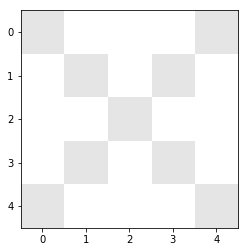

Node "1" activation value=  0.72840136


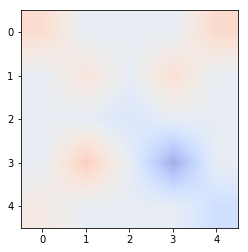

Node "2" activation value=  2.6623507


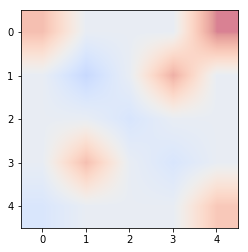

Node "3" activation value=  0.0


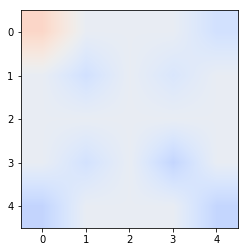

Node "4" activation value=  2.4437444


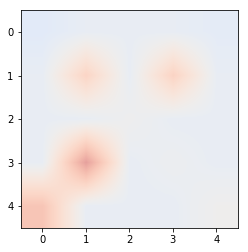

Node "5" activation value=  2.1295373


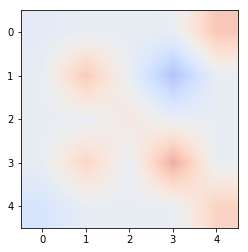

Node "6" activation value=  1.0385756


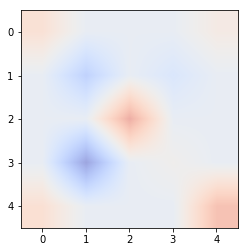

Node "7" activation value=  0.100471325


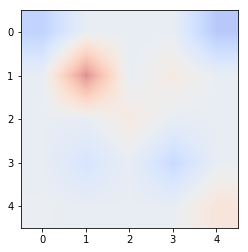

Node "8" activation value=  2.705394


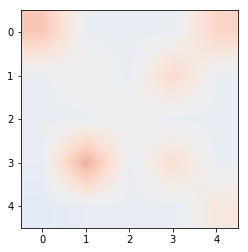

Hidden Layer Outputs for "M": [array([[0.985, 2.181, 0.   , 0.979, 3.112, 3.555, 2.924, 0.   ]],
      dtype=float32)]
Output Layer Outputs for "M": [array([[0.007, 0.797, 0.112, 0.049, 0.035]], dtype=float32)]


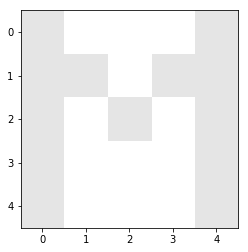

Node "1" activation value=  0.9852564


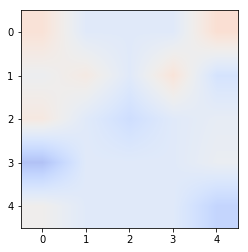

Node "2" activation value=  2.1812487


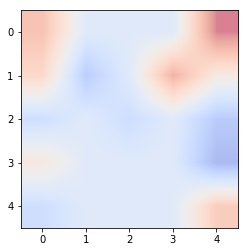

Node "3" activation value=  0.0


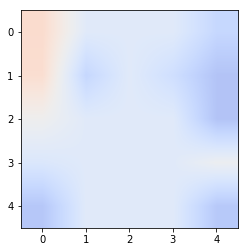

Node "4" activation value=  0.9794539


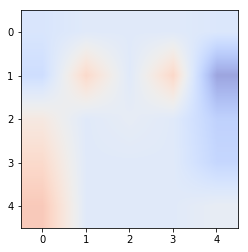

Node "5" activation value=  3.1122684


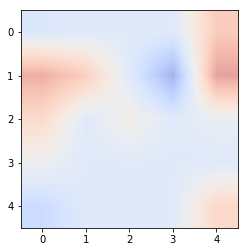

Node "6" activation value=  3.5549495


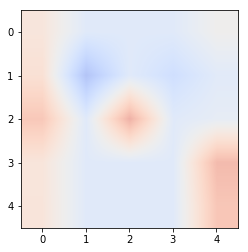

Node "7" activation value=  2.923945


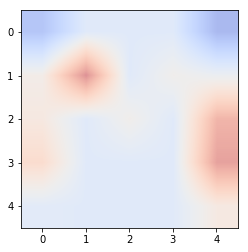

Node "8" activation value=  0.0


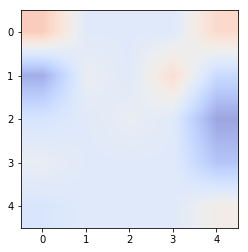

Hidden Layer Outputs for "N": [array([[0.005, 1.347, 0.   , 0.609, 4.323, 3.786, 2.46 , 0.   ]],
      dtype=float32)]
Output Layer Outputs for "N": [array([[0.001, 0.12 , 0.853, 0.015, 0.011]], dtype=float32)]


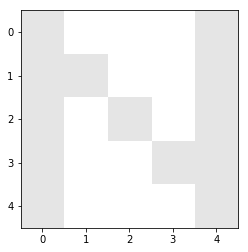

Node "1" activation value=  0.004988022


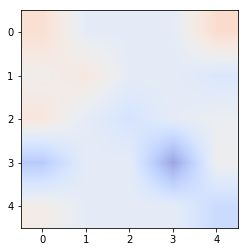

Node "2" activation value=  1.3473344


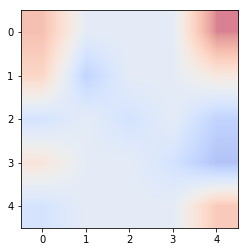

Node "3" activation value=  0.0


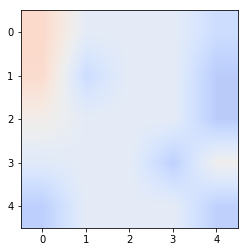

Node "4" activation value=  0.6093153


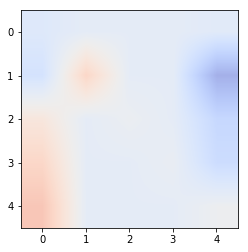

Node "5" activation value=  4.323176


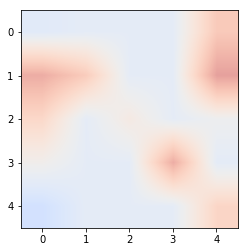

Node "6" activation value=  3.78591


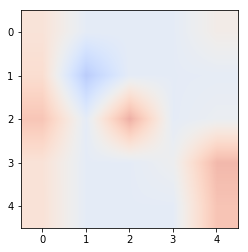

Node "7" activation value=  2.4603448


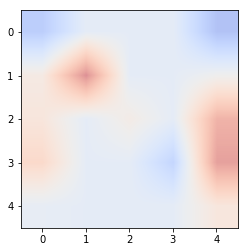

Node "8" activation value=  0.0


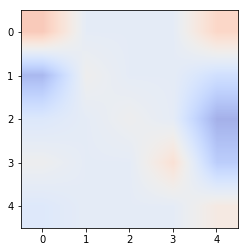

Hidden Layer Outputs for "H": [array([[1.343, 2.195, 0.   , 0.015, 2.183, 5.338, 1.229, 0.   ]],
      dtype=float32)]
Output Layer Outputs for "H": [array([[0.   , 0.052, 0.015, 0.924, 0.009]], dtype=float32)]


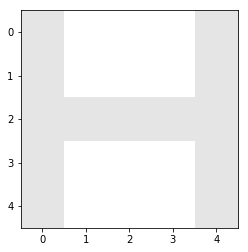

Node "1" activation value=  1.3425046


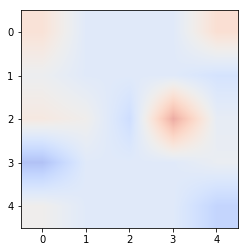

Node "2" activation value=  2.1951532


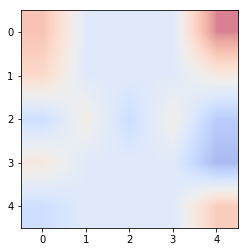

Node "3" activation value=  0.0


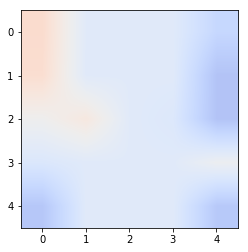

Node "4" activation value=  0.015301883


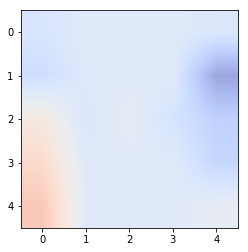

Node "5" activation value=  2.1830149


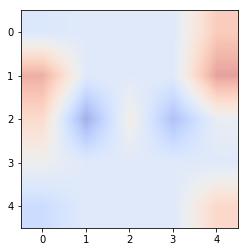

Node "6" activation value=  5.338293


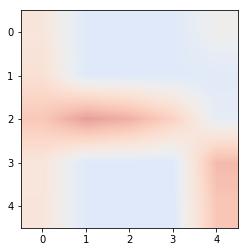

Node "7" activation value=  1.2290397


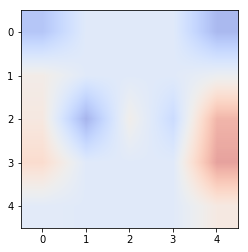

Node "8" activation value=  0.0


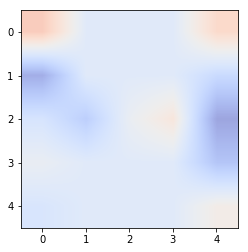

Hidden Layer Outputs for "A": [array([[1.176, 0.004, 0.   , 2.397, 0.215, 4.356, 2.961, 0.   ]],
      dtype=float32)]
Output Layer Outputs for "A": [array([[0.   , 0.03 , 0.015, 0.008, 0.948]], dtype=float32)]


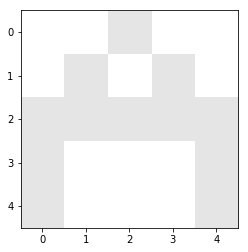

Node "1" activation value=  1.1756257


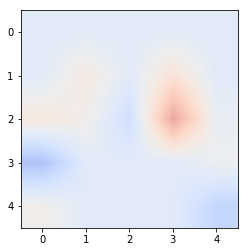

Node "2" activation value=  0.004106581


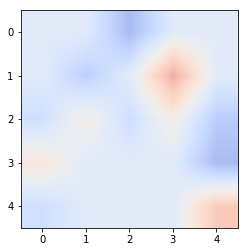

Node "3" activation value=  0.0


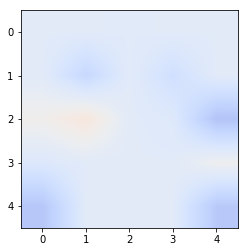

Node "4" activation value=  2.3966184


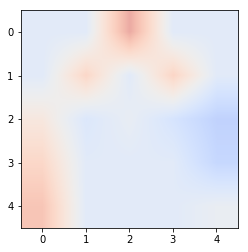

Node "5" activation value=  0.21462327


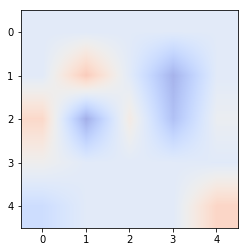

Node "6" activation value=  4.356116


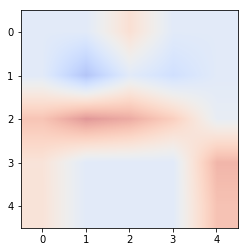

Node "7" activation value=  2.9605436


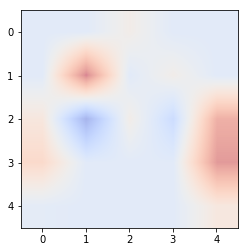

Node "8" activation value=  0.0


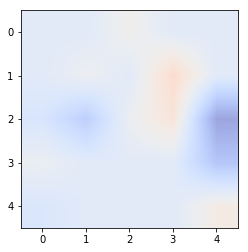

In [11]:
if __name__ == "__main__": main()